<a href="https://www.kaggle.com/code/muhammedtausif/heart-attack-prediction-eda?scriptVersionId=117829658" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="background-color:yellow; color:red; padding:20px; font-size:30px">
    Original work can be found
    <a href="https://www.kaggle.com/code/ahedjneed/heart-attack-prediction-eda/notebook">here</a> 
    By AHED JNEED ( @ahedjneed )
</p>

Please appricate the parent work also if you want to appriciate this work.

<div style='display:none'>
Working on...

<div>This is div</div>

<button class="btn btn-success">ABC</button>

<div class="dropdown">
  <button class="btn btn-primary dropdown-toggle" type="button" id="dropdown" data-bs-toggle="dropdown" aria-expanded="false">
    Dropdown
  </button>
  <ul class="dropdown-menu" aria-labelledby="dropdown">
    <li><a class="dropdown-item" href="#">Dropdown item</a></li>
    <li><a class="dropdown-item" href="#">Dropdown item</a></li>
    <li><a class="dropdown-item" href="#">Dropdown item</a></li>
  </ul>
</div>

<button class="sc-gVFcvn tMYCk sc-gMaaaA befnLY">Good</button>

</div>

# Set Up

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: center;   font-size:28px; font-family  :cursive"> Import Libraries <a id=3></a> </p> 
</div>  
<hr style='border-style: inset; margin-top: -1em; border-width: 1px;'></hr>
<p></p>

### Importing core liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

### Importing liberaries for ML

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; Importing the Dataset <a id=6></a></p>
</div>

### Loading the dataset into DF dataframe

In [3]:
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

### Preview the dimention of the dataset

In [4]:
df.shape

(303, 14)

### Displaying the first five records

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preview the info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Preparation

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;Explor missing values <a id=7></a></p>
</div>

Text(0.5, 1.0, 'Null Values in Data Frame')

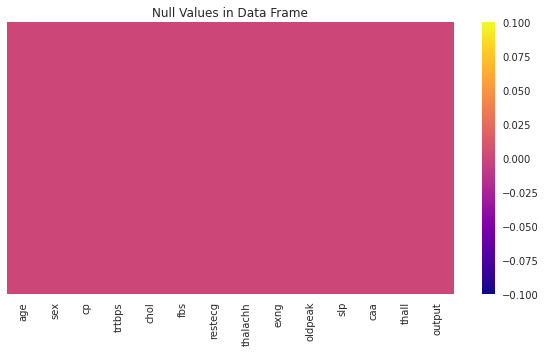

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [8]:
# get the number of missing data points per column
missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percent of data that is missing
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print('Percentage of missing value in Data Frame is:', total_missing_value / total_cells*100)
print('Total number of our cells is:', total_cells)
print('Total number of our missing value is:', total_missing_value)

Series([], dtype: int64)
Percentage of missing value in Data Frame is: 0.0
Total number of our cells is: 4242
Total number of our missing value is: 0


**Fortunately!! we don't have any missing values**

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;Data Preparation <a id=7></a></p>
</div>

In [9]:
# Labeling data fields to Text value for easy interpretation of Visualization
data_eda = df.copy()

data_eda["sex"]     = df["sex"]    .map({1: "Male",           0: "Female"})
data_eda["cp"]      = df["cp"]     .map({1: "Typical\nangina", 2: "Atypical\nangina", 3:"Non-anginal\npain", 0: "Asymptomatic"})
data_eda["fbs"]     = df["fbs"]    .map({1: "True",           0: "False"})
data_eda["restecg"] = df["restecg"].map({1: "Normal",         2: "Having\nST-T wave\nabnormality",          0: "Hypertrophy"})
data_eda["exng"]    = df["exng"]   .map({1: "Yes" ,           0: "No"})
data_eda["slp"]     = df["slp"]    .map({2: "Upsloping",      1: "Flat" ,           0: "Downsloping"})
data_eda["caa"]     = df["caa"]    .map({0: "0",              1: "1" ,              2: "2",               3:"3" ,4:"3"})
data_eda["thall"]   = df["thall"]  .map({0: "Null",         2: "Normal" ,         1: "Fixed defect" ,   3: "Reversible\ndefect"})
data_eda["heart_disease"]  = df["output"] .map({1: "Yes" ,           0: "No"})

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;Clarify features<a id=7></a></p>
</div>

<hr style='border-style: inset; margin-top: -1em; border-width: 1px;'></hr>
<p></p>


1. **`age`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Age in Years

2. **`sex`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Sex of the Patient
      >>>> * 1 = Male              
      >>>> * 2 = Female
3. **`cp`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Chest Pain Type
      >>>> * 1 = Typical angina      
      >>>> * 2 = Atypical angina   
      >>>> * 3 = Non-anginal pain
4. **`trtbps`** - Resting Blood Pressure (in mm Hg on admission to the hospital)

5. **`chol`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Serum Cholesterol in mg/dl

6. **`fbs`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Fasting Blood sugar > 120 mg/dl 
      >>>> * 0 = False                        
      >>>> * 1 = True  
7. **`restecg`**&nbsp;&nbsp; - Resting Electrocardiographic Results 
      >>>> * 0 = Hypertrophy                  
      >>>> * 1 = Normal             
      >>>> * 2 = Having ST-T wave abnormality
8. **`thalachh`**&nbsp;&nbsp; - Maximum Heart Rate Achieved

9. **`exng`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Exercise Induced Angina 
      >>>> * 0 = No                           
      >>>> * 1 = Yes
10. **`oldpeak`**&nbsp;&nbsp; - ST Depression Induced by Exercise Relative to Rest

11. **`slp`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - The Slope of the Peak Exercise ST Segment   
      >>>> * 0 = Downsloping                 
      >>>> * 1 = Flat            
      >>>> * 2 = Upsloping
12. **`caa`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Number of Major Vessels (0-3) Colored by Flourosopy

13. **`thall`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Thallium Stress Test Result
      >>>> * 0 = Null                         
      >>>> * 1 = Fixed defect        
      >>>> * 2 = Normal                       
      >>>> * 3 = Reversible defect
14. **`output`**&nbsp;&nbsp;&nbsp;&nbsp; - The Predicted Attribute - Diagnosis of Heart Disease (angiographic disease status)
      >>>> * 0 = < 50% Diameter Narrowing (Heart Attack= No )        
      >>>> * 1 = > 50% Diameter Narrowing (Heart Attack= Yes)
                 

<hr style='border-style: inset; border-width: 0.0000001px;'>

# Exploratory Data Analysis(EDA)

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Plot-Graph functions <a id=11></a></p>
</div>

In [10]:
def cnditioning_linear_plot(x,y,hue,df):
    sns.lmplot(x=x, y=y, hue=hue, data=df,
               markers=["o", "x"], palette="Set1")

In [11]:
def count_bar_plot(df,x,hue,title):
    fig = sns.countplot(x=x, hue=hue, data=df)
    fig.set_title(title)

In [12]:
def pie_graph(df,title,values):   
    labels = df[values].value_counts().index
    values = df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Descriptive Statistics <a id=11></a></p>
</div>

In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


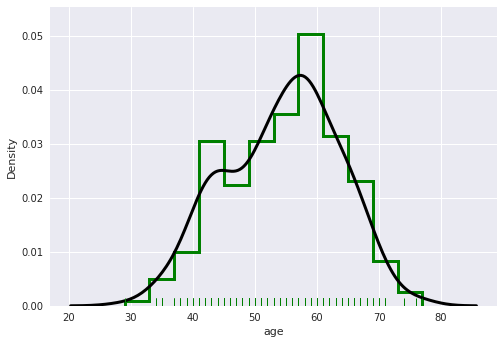

In [14]:
ax = sns.distplot(df['age'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [15]:
## cohort analysis of age with output
def age_cohort(age):
    if age <= 45:
        return "0-45"
    elif age > 45 and age <= 55:
        return "45-55"
    elif age > 55 and age <= 60:
        return "55-60"
    elif age > 60:
        return "60+"
    
data_eda['age group'] = data_eda['age'].apply(age_cohort)
data_eda.sort_values('age group', inplace = True)

In [16]:
pie_graph(data_eda,"Age Group Distribution",'age group')

In [17]:
pie_graph(data_eda, 'Gender Distribution','sex')

In [18]:
pie_graph(data_eda, 'Chest Pain Distribution','cp')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



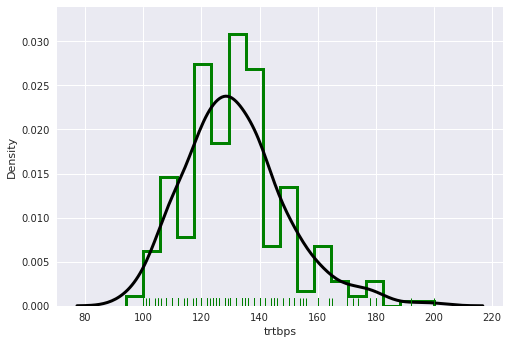

In [19]:
ax = sns.distplot(df['trtbps'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



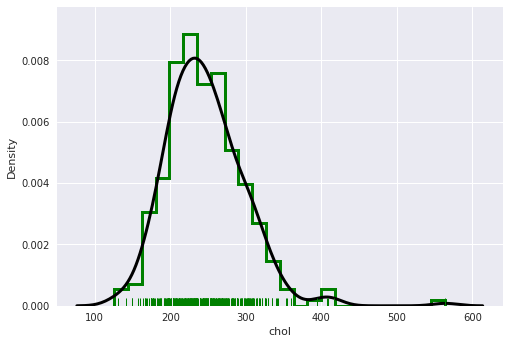

In [20]:
ax = sns.distplot(df['chol'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [21]:
pie_graph(data_eda, 'Fasting Blood sugar Distribution','fbs')

In [22]:
pie_graph(data_eda, 'Resting Electrocardiographic Results  Distribution','restecg')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



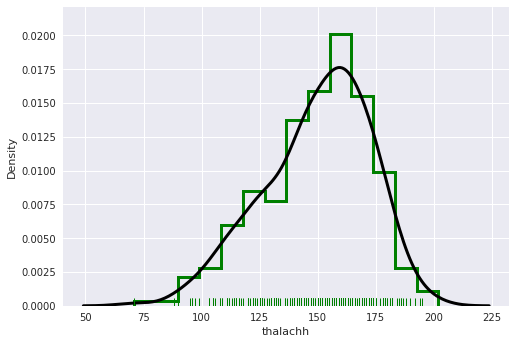

In [23]:
ax = sns.distplot(df['thalachh'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [24]:
pie_graph(data_eda, 'Exercise Induced Angina  Distribution','exng')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



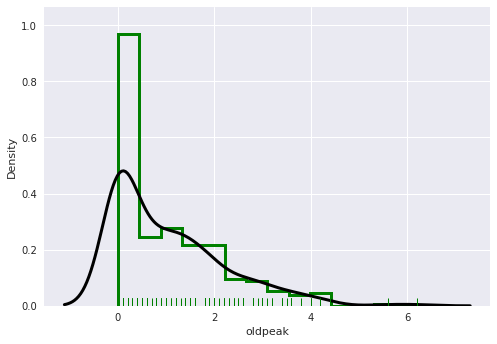

In [25]:
ax = sns.distplot(df['oldpeak'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [26]:
pie_graph(data_eda, 'he Slope of the Peak Exercise ST Segment  Distribution','slp')

In [27]:
pie_graph(df,'Number of Major Vessels (0-3) Colored by Fluoroscopy','caa')

In [28]:
pie_graph(data_eda,'Thallium Stress Test Result Distribution','thall')

In [29]:
pie_graph(data_eda, 'Heart Disease Distribution', 'heart_disease')

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Statistics Summary<a id=11></a></p>
</div>

<hr style='border-style: inset; margin-top: -1em; border-width: 1px;'></hr>
<p></p>


1. **`age`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Age in Years
      >>>> * We have seen that the number of people between the ages of 0 to 45 is 64 and they represent approximately 21 percent
      >>>> * We have seen that the number of people between the ages of 55 to 60 is 72 and they represent approximately 24 percent
      >>>> * We have seen that the number of people between the ages of 60+ is 79 and they represent approximately 26 percent
      >>>> * We have seen that the number of people between the ages of 45 to 55 is 88 and they represent approximately 29 percent
      >>>> * We have also seen that **Mean Age**: is approximately 54 years old and **Minimum**: 29 years old and **Maximum**: 77 years old.
      
2. **`sex`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Sex of the Patient
      >>>> * Patients are 31.7% "Female" and 68.3% "Male"        
3. **`cp`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Chest Pain Type
      >>>> *  Asymptomatic, They represent 47.2 percent of patients
      >>>> *  Typical angina, They represent 16.5 percent of patients     
      >>>> *  Atypical angina,They represent 28.7 percent of patients   
      >>>> *  Non-anginal pain, They represent 7.59 percent of patients
4. **`trtbps`** - Resting Blood Pressure (in mm Hg on admission to the hospital)
      >>>> * **Mean Resting Blood Pressure**: is approximately 131.6 mm Hg and **Minimum**: 94 mm Hg and **Maximum**: 200 mm Hg.
      >>>> * we've also seen that the majority of patients have  Resting Blood Pressure  between 120 to 140 mm Hg.
      
5. **`chol`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Serum Cholesterol in mg/dl
      >>>> * **Mean Serum Cholesterol**: is approximately 246.2 mg/dl and **Minimum**: 126 mg/dl and **Maximum**: 564 mg/dl.
      >>>> * we've also seen that the majority of patients have the Serum Cholesterol between 200 to 280 mg/dl.
      
6. **`fbs`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Fasting Blood sugar > 120 mg/dl 
      >>>> * False(< 120 mg/dl) about 15%               
      >>>> * True(> 120 mg/dl) about 85% 
      
7. **`restecg`**&nbsp;&nbsp; - Resting Electrocardiographic Results 
      >>>> Percentage: 
      >>>> * Hypertrophy  48.5%                
      >>>> * Normal 50.2%             
      >>>> * Having ST-T wave abnormality 1.32%
8. **`thalachh`**&nbsp;&nbsp; - Maximum Heart Rate Achieved
      >>>> * **Mean Maximum Heart Rate Achieved**: is approximately 149.6 and **Minimum**: 71 and **Maximum**: 202.
      >>>> * we've also seen that the majority of patients have Maximum Heart Rate Achieved between 130 to 175.
      
9. **`exng`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Exercise Induced Angina 
      >>>> * 32.7% of patients have not Exercise Induced Angina                           
      >>>> * 67.3% of patients have Exercise Induced Angina
      
10. **`oldpeak`**&nbsp;&nbsp; - ST Depression Induced by Exercise Relative to Rest
      >>>> * **Mean**: is approximately 1.03 and **Minimum**: 0 and **Maximum**: 6.2.
      >>>> * we've also seen that the majority of patients are between 0 to 1.

11. **`slp`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - The Slope of the Peak Exercise ST Segment   
      >>>> * 6.93% of patients are Downsloping         
      >>>> * 46.2% of patients are Flat            
      >>>> * 46.9% of patients are Upsloping
12. **`caa`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Number of Major Vessels (0-3) Colored by Flourosopy
      >>>> * zero's are 57.8%
      >>>> * one's are 21.5%
      >>>> * two's are 12.5%
      >>>> * three's are 6.6%
      >>>> * four's are 1.65%
13. **`thall`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Thallium Stress Test Result
      >>>> * Patients who have Null Thallium Stress Test Result are 0.66%                       
      >>>> * Patients who have Fixed defect Thallium Stress Test Result are 5.94%         
      >>>> * Patients who have normal Thallium Stress Test Result are 54.8%                       
      >>>> * Patients who have Reversible defect Thallium Stress Test Result are 38.6%
14. **`output`**&nbsp;&nbsp;&nbsp;&nbsp; - The Predicted Attribute - Diagnosis of Heart Disease (angiographic disease status)
      >>>> * 54.5% of patients have heart disease    
      >>>> * 45.5% of patients dosen't have heart disease
                 

<hr style='border-style: inset; border-width: 0.0000001px;'>

# Data Visualization

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Categorical Feature (Bar Plots)<a id=11></a></p>
</div>

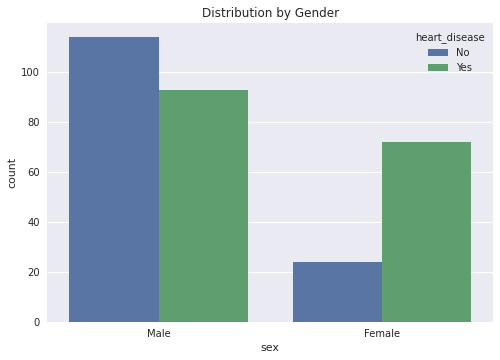

In [30]:
count_bar_plot(data_eda,'sex','heart_disease','Distribution by Gender')

* as we can see that the number of Male who have heart disease is more than the number of the Female

**which is very logical thing because the percentage of males in this data set about 69%**

* but also the number of Females(80) who have heart disease is way more than the females who haven't(20). **four times the number**

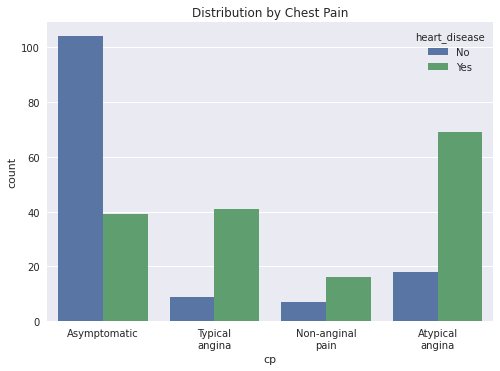

In [31]:
count_bar_plot(data_eda,'cp','heart_disease','Distribution by Chest Pain')

* as we can see that the most of patients who have atypical angina chest pain have heart disease

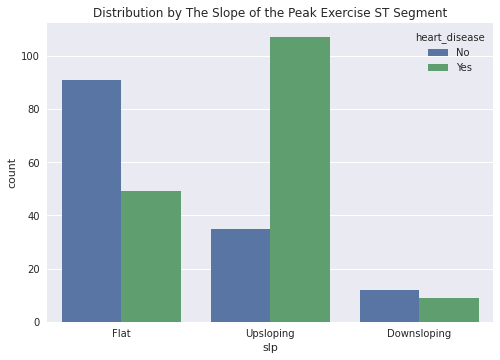

In [32]:
count_bar_plot(data_eda,'slp','heart_disease','Distribution by The Slope of the Peak Exercise ST Segment')

* as we can see that the most of patients who have Upsloping slp have heart disease
* and we also see that the patients who have Flat slp half of them have heart disease

* 

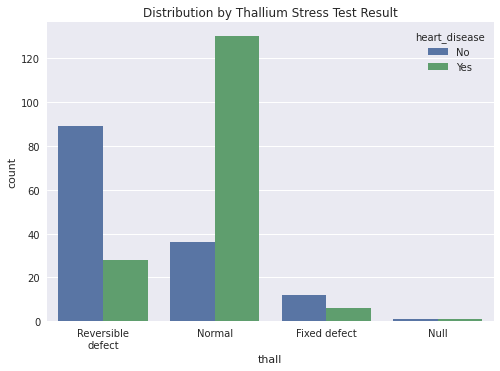

In [33]:
count_bar_plot(data_eda,'thall','heart_disease','Distribution by Thallium Stress Test Result')

* as we can see that the most of patients who have normal thallium stress have heart disease

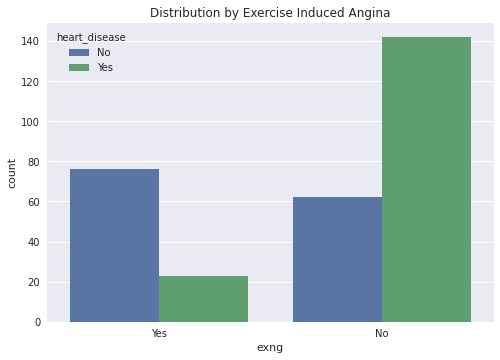

In [34]:
count_bar_plot(data_eda,'exng','heart_disease','Distribution by Exercise Induced Angina')

* as we can see that patients who doesn't have exercise induced angina have heart disease way more in compare to the patients who have.

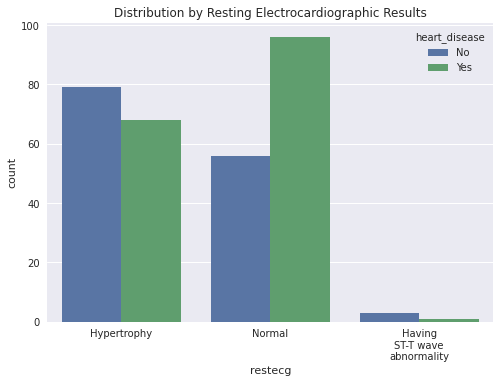

In [35]:
count_bar_plot(data_eda,'restecg','heart_disease','Distribution by Resting Electrocardiographic Results')

* as we can see that the patients who have normal 'restecg' have heart disease
* and we also see that the patients who have hypertrophy about 70 of 150 have heart disease

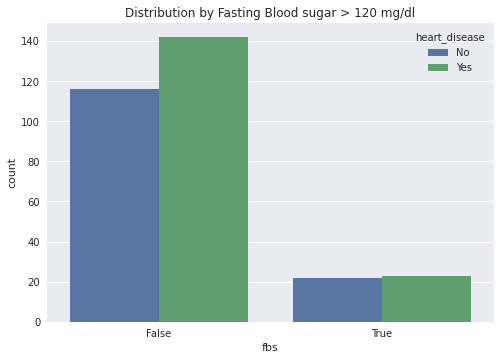

In [36]:
count_bar_plot(data_eda,'fbs','heart_disease','Distribution by Fasting Blood sugar > 120 mg/dl')

* as we can see that the majority of patients who have Fasting blood sugar under 120 mg/dl have heart disease.

**but there is Patients(about 120 of 260) who also have Fasting blood sugar under 120 mg/dl doesn't have heart disease**

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Numeric Features (Regressionplot)<a id=11></a></p>
</div>

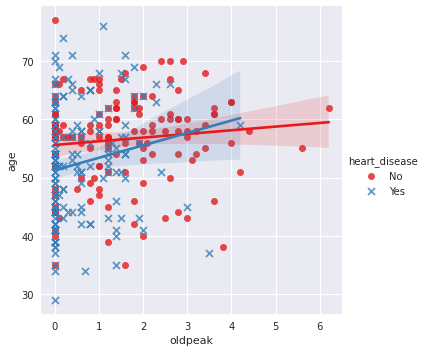

In [37]:
cnditioning_linear_plot('oldpeak','age','heart_disease',data_eda)

* as we can see that that majority of patients who have heart disease are between 50-60 years old.
* and we can see also from the linear that the more you get older in this age group, the more possible that you get heart disease.

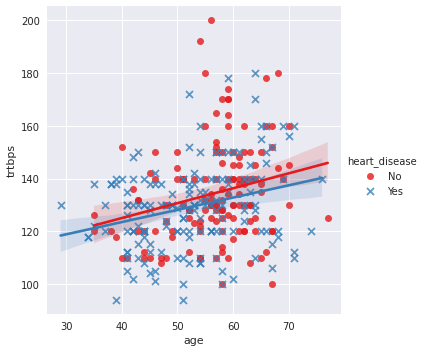

In [38]:
cnditioning_linear_plot('age','trtbps','heart_disease',data_eda)

* as we can see that that majority of patients who have heart disease have between 120-140mm Hg (Resting Blood Pressure).
* and we can see also from the linear that the **same** amount of Resting Blood Pressure there is patients who **doesn't** have heart disease

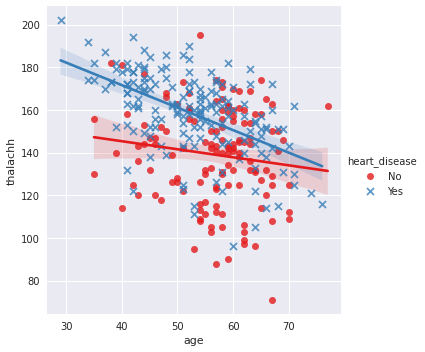

In [39]:
cnditioning_linear_plot('age','thalachh','heart_disease',data_eda)

* as we can see that that majority of patients who have heart disease have between 190-140 Maximum Heart Rate Achieved.

**but inrange 140-150 you may still in a safe zone**

* and we can see also from the linear that that more you have higher Maximum Heart Rate Achieved and geting older, the more possible that you have heart disease

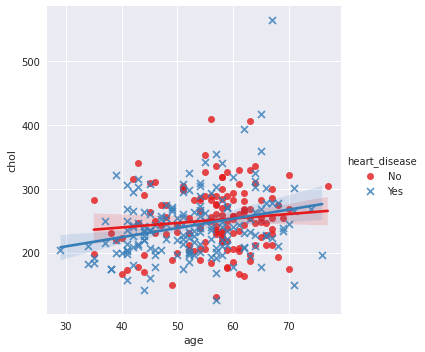

In [40]:
cnditioning_linear_plot('age','chol','heart_disease',data_eda)

* as we can see that that majority of patients who have heart disease have between 200-280mg/dl Serum Cholesterol.
* but inrange 140-150 you also may still not having a heart disease

# Feature Engineering

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Correlation Analysis<a id=11></a></p>
</div>

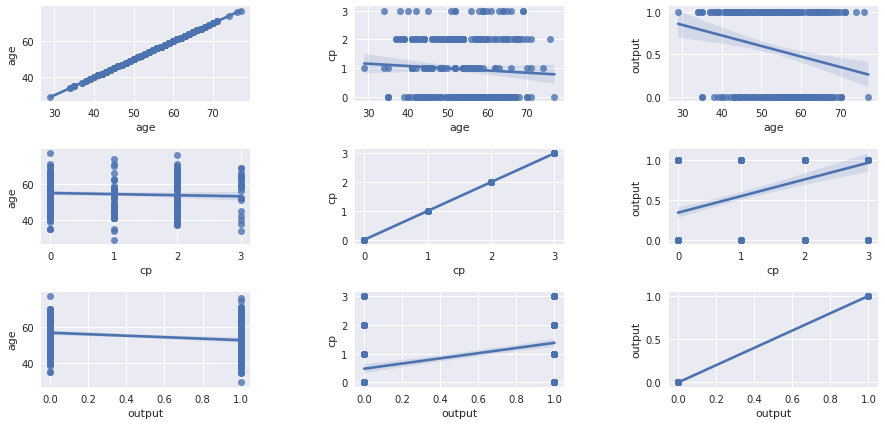

In [41]:
plt.figure(1, figsize=(15,7))
n = 0
for x in ['age','cp','output']:
    for y in ['age','cp','output']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

<AxesSubplot:>

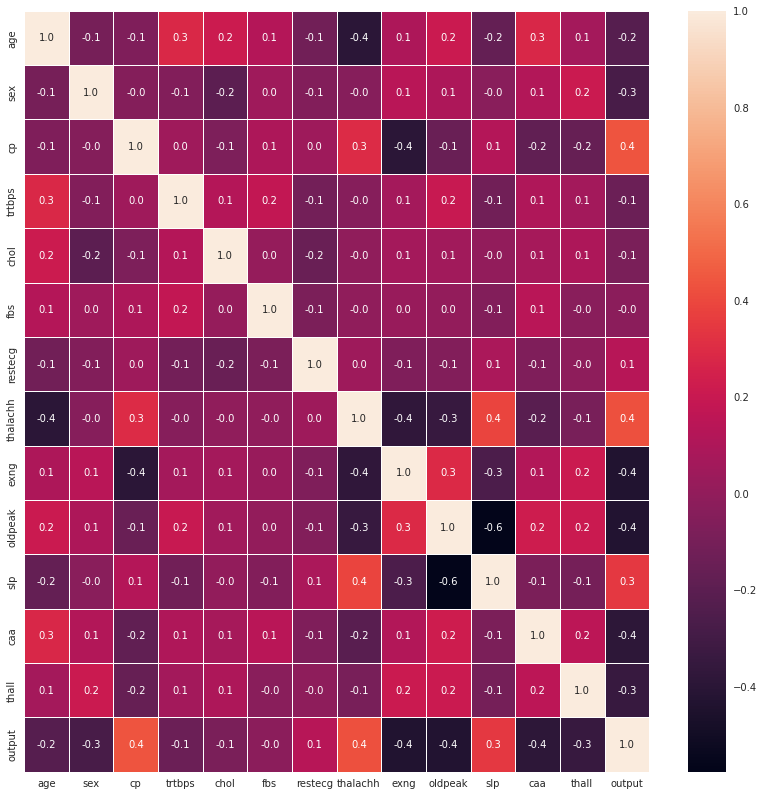

In [42]:
f, ax = plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)

In [43]:
df.corr()['output'].sort_values(ascending = False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

# Pre Modeling Steps

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Declare feature vector and target variable<a id=11></a></p>
</div>

In [44]:
X = df.drop(columns = ['output'])
y = df['output']

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Split data into separate training and test set<a id=11></a></p>
</div>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .2,
                                                    random_state = 777)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Feature Scaling<a id=11></a></p>
</div>

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply Machine Learning Models

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Random Forest Classifier
and evaluate the model<a id=11></a></p>
</div>

Testing-set Accuracy score is: 0.8360655737704918
Training-set Accuracy score is: 1.0


<AxesSubplot:>

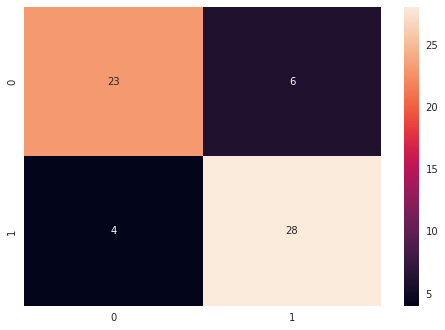

In [47]:
clf_rf = RandomForestClassifier(random_state=777)
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf.predict(X_train)))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = "d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Ada Boost Classifier
and evaluate the model<a id=11></a></p>
</div>

AdaBoost Classifier Model Accuracy is: 0.7868852459016393


<AxesSubplot:>

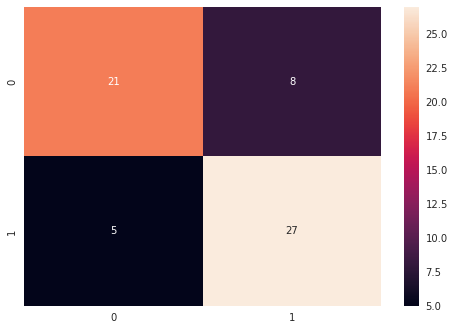

In [48]:
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1, 
                         random_state = 777)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
acc = accuracy_score(y_test, y_pred_abc)
print('AdaBoost Classifier Model Accuracy is:',acc)
cm = confusion_matrix(y_test, y_pred_abc)
sns.heatmap(cm, annot = True, fmt="d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Gradient Boosting Classifier
and evaluate the model<a id=11></a></p>
</div>

Gradient Boosting Classifier Model Accuracy score is: 0.819672131147541


<AxesSubplot:>

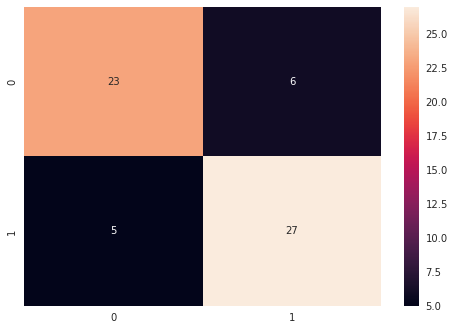

In [49]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt="d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build KNN Model 
and evaluate the model<a id=11></a></p>
</div>

KNN Model Acuuracy is: 0.819672131147541


<AxesSubplot:>

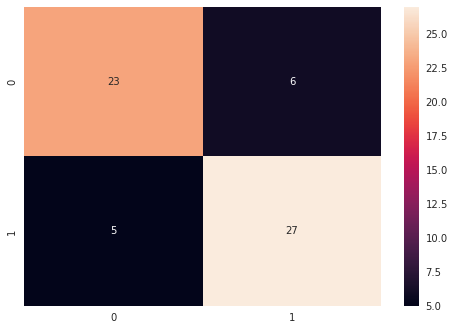

In [50]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)
print("KNN Model Acuuracy is:", acc)
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, fmt="d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build SVC Model
and evaluate the model<a id=11></a></p>
</div>

SVC Accuracy score is: 0.819672131147541


<AxesSubplot:>

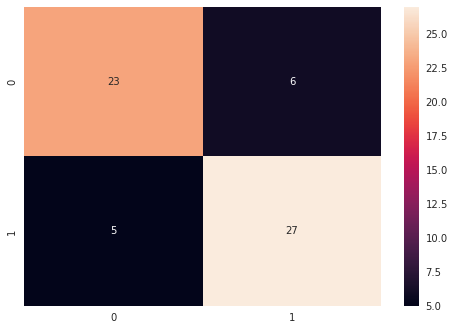

In [51]:
svc = SVC(random_state = 777)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc)
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot = True, fmt = "d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Logistic Regression Model
and evaluate the model<a id=11></a></p>
</div>

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
print(report)

LogisticRegression accuracy score is: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Decision Tree Classifier
and evaluate the model<a id=11></a></p>
</div>

Decision Tree accuracy score is : 0.7049180327868853


<AxesSubplot:>

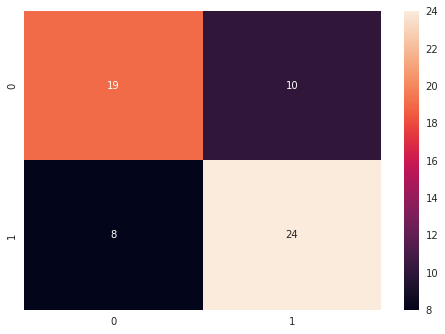

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy score is :",acc)
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt = "d")

0:	learn: 0.6931161	total: 53.3ms	remaining: 480ms
1:	learn: 0.6930867	total: 53.8ms	remaining: 215ms
2:	learn: 0.6930608	total: 54.2ms	remaining: 126ms
3:	learn: 0.6930315	total: 54.7ms	remaining: 82ms
4:	learn: 0.6930060	total: 55.1ms	remaining: 55.1ms
5:	learn: 0.6929798	total: 55.6ms	remaining: 37.1ms
6:	learn: 0.6929483	total: 56.1ms	remaining: 24ms
7:	learn: 0.6929247	total: 56.5ms	remaining: 14.1ms
8:	learn: 0.6928950	total: 56.9ms	remaining: 6.32ms
9:	learn: 0.6928699	total: 57.3ms	remaining: 0us
Cat Boost Classifier accuracy score is: 0.9016393442622951


<AxesSubplot:>

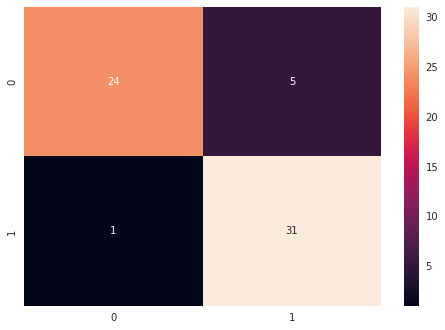

In [54]:
cbc = CatBoostClassifier( iterations=10, 
                          learning_rate=0.0001 )
cbc = cbc.fit(X_train,y_train)
cbc_pred = cbc.predict(X_test)
acc = accuracy_score(y_test,cbc_pred)
print("Cat Boost Classifier accuracy score is:",acc)
cm = confusion_matrix(y_test,cbc_pred)
sns.heatmap(cm, annot = True, fmt = "d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Voting Classifier
and evaluate the model<a id=11></a></p>
</div>

Voting Classifier Accuracy Score is: 
0.8360655737704918


<AxesSubplot:>

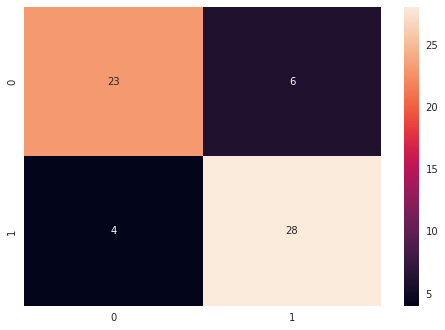

In [55]:
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Voting Classifier Accuracy Score is: ")
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt="d")

* **Cool! we got 90% accuracy with 'CatBoostClassifier'**

* **For those who want to take this notebook to the next level, copy this notebook and optimize the model for higher accuracy.**

* **If you're about to make a notebook in this data set or have already made one that you can share with me, I'd be happy to check it out.**

* **so this is the end if you any questions or advice me please write in the comment**

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: center;   font-size:28px; font-family  :cursive">The End<a id=11></a></p>
</div>